In [2]:
# a Importing Necessary packages
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import random #generates random numbers

In [3]:
# b Load the training and testing data (MNIST)
mnist = tf.keras.datasets.mnist

In [4]:
# splitting it into training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# Normalising or scalling data
x_train = x_train / 255 # pixel values will convert from 0 to 255 to 0 to 1 floating point values
x_test = x_test / 255


In [8]:
# c Define the network architecture using keras

model = keras.Sequential([
keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(128, activation = 'relu'),
keras.layers.Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# d train the model using SGD

model.compile(optimizer = 'sgd',
loss = 'sparse_categorical_crossentropy',   
metrics = ['accuracy'])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

#loss='sparse_categorical_crossentropy'-used when your class labels are integers (not one-hot encoded).

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6385 - accuracy: 0.8437 - val_loss: 0.3495 - val_accuracy: 0.9069
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3311 - accuracy: 0.9075 - val_loss: 0.2855 - val_accuracy: 0.9211
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2816 - accuracy: 0.9213 - val_loss: 0.2538 - val_accuracy: 0.9288
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2511 - accuracy: 0.9297 - val_loss: 0.2298 - val_accuracy: 0.9348
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2288 - accuracy: 0.9361 - val_loss: 0.2144 - val_accuracy: 0.9380
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2111 - accuracy: 0.9413 - val_loss: 0.2000 - val_accuracy: 0.9440
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1969 - accuracy: 0.9450 - val_loss: 0.1870 - val_accuracy

In [10]:
# e Evaluuate the network

test_loss, test_acc = model.evaluate(x_test, y_test)
print('loss=%.3f' %test_loss)
print('Accuracy=%.3f' %test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1615 - accuracy: 0.9524
loss=0.161
Accuracy=0.952


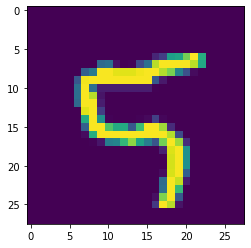

313/313 [==============================] - 1s 4ms/step


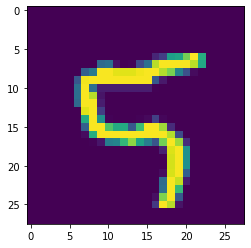

In [11]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

In [12]:
print('predicted value: ', predicted_value[n])

predicted value:  [3.70943511e-04 5.78569830e-04 2.99250484e-02 7.44104851e-03
 6.97460258e-03 7.50950098e-01 6.09065639e-04 1.41687095e-02
 1.82967149e-02 1.70685291e-01]


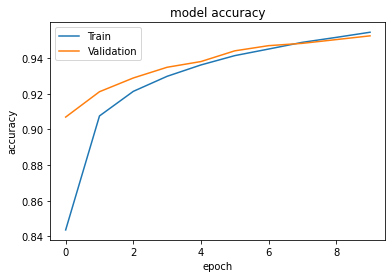

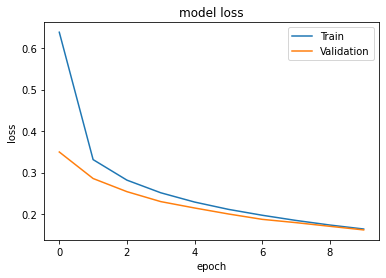

In [13]:
# f plot the training loss and accuracy

# plotting the training accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plotting the training loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()